In [269]:
from root_pandas import read_root
import matplotlib.pyplot
import numpy as np
from matplotlib import legend
dir = "/Users/mykola/Physics/CaloML/My_sim/calo_sim/calo_sim/"
file = "calo_sim_output1500t05.root"

#reading a TTree into Pandas dataframe (PD)
input_data = read_root(dir+file)

In [268]:
input_data.columns

Index(['Cell_E_truth_L2', 'Cell_E_reco_noise_L2', 'Cell_E_reco_noiseXT_L2',
       'Cell_E_fake_L2', 'Cell_t_reco_noise_L2', 'Cell_t_reco_noiseXT_L2',
       'Cell_t_fake_L2', 'Cell_t_delay_L2', 'Cell_signal_samples_L2',
       'Cell_noise_samples_L2', 'Cell_XTc_samples_L2', 'Cell_XTl_samples_L2',
       'Energy_L2', 'Impact_Energy', 'tau_0', 'xtc_amplitude_l2',
       'xtl_amplitude_l2', 'ai', 'bi'],
      dtype='object')

Currently our branches look like columns in PD, each column is basically a vector of vectors:

In [283]:
# 1500 generated events resulted in a vector of 1500 values
input_data["Cell_E_truth_L2"].shape

(1500,)

Each element of this vector is a vector of doubles of length 25 if it's a cell energy/time

In [278]:
input_data["Cell_E_truth_L2"][0].shape

(100,)

Or of length 100 if it's a signal sample

In [ ]:
input_data["Cell_signal_samples_L2"]

If we want to reconstruct time from every cell of the cluster then we just put all the cells into a long array of length 1500*25 

In [282]:
#first we stack the arrays such that from 1D array of 1500 elements with each element being an array on its own
#we go to 2D array of size (1500,25)
np.stack(input_data["Cell_t_reco_noise_L2"]).shape

(1500, 25)

In [288]:
#then we flatten the array, obtaining a long array of 1500*25 elements
#for time reconstruction we need to take the mean of all the cells time
t_reco = ((np.stack(input_data["Cell_t_reco_noise_L2"]))).flatten()
t_recoXT = ((np.stack(input_data["Cell_t_reco_noiseXT_L2"]))).flatten()

In [297]:
#here we take into account only the hottest cell 
t_reco_hotest = np.transpose(np.stack(input_data["Cell_t_reco_noise_L2"]))[12]
t_reco_hotestXT = np.transpose(np.stack(input_data["Cell_t_reco_noiseXT_L2"]))[12]

In [311]:
#defining plotting function
def plot_tau(x, lab, col):
    figure(figsize=(8, 6), dpi=80)
    x_max, _ ,_ = plt.hist(x, range=(x.mean()-3*x.std(),x.mean()+3*x.std()), bins = 30, label = lab, color = col)
    plt.text(x.mean()-3*x.std(), x_max.max()*0.85, f"mean: {round(x.mean(), 3)}", fontsize=20)    
    plt.xlabel("tau reco")
    plt.legend(prop={"size":20})
    plt.show()

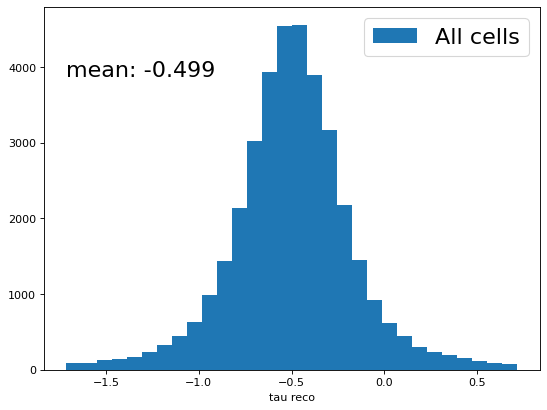

In [312]:
plot_tau(t_reco, "All cells", None)

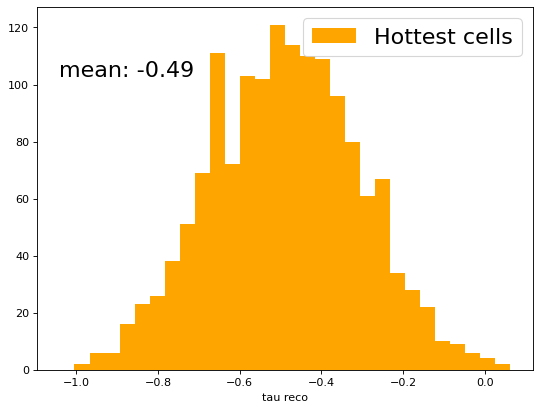

In [314]:
plot_tau(t_reco_hotest, "Hottest cells", "orange")

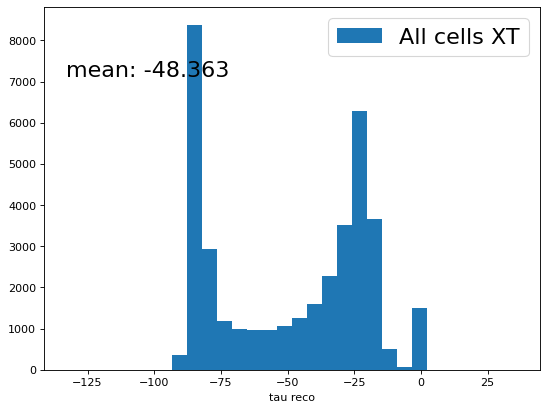

In [321]:
plot_tau(t_recoXT, "All cells XT", None)

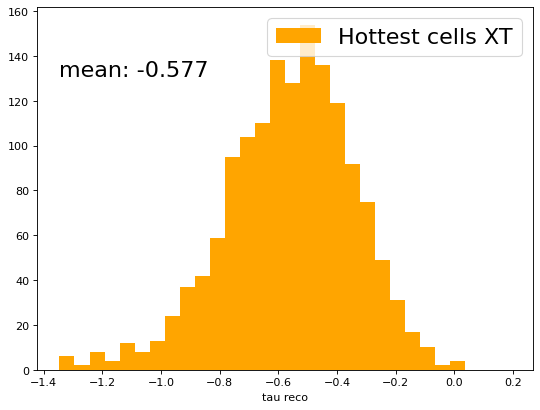

In [322]:
plot_tau(t_reco_hotestXT, "Hottest cells XT", "orange")

In [358]:
#Function to plot the sum of energies
def plot_e(x, lab, col):
    x = np.stack(x)
    x = np.array([x.sum() for x in x]) 
    figure(figsize=(8, 6), dpi=80)
    x_max, _ ,_ = plt.hist(x, range=(x.mean()-3*x.std(),x.mean()+3*x.std()), bins = 30, label = lab, color = col)
    plt.text(x.mean()-3*x.std(), x_max.max()*0.85, f"mean: {round(x.mean(), 1)}", fontsize=20)    
    plt.xlabel("E reco")
    plt.legend(prop={"size":20})
    plt.show()


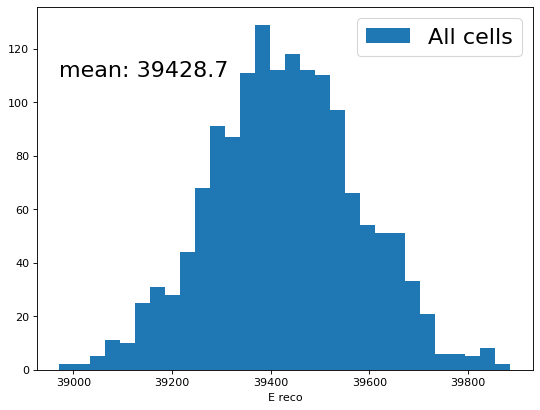

In [359]:
plot_e(input_data["Cell_E_reco_noise_L2"], "All cells", None)

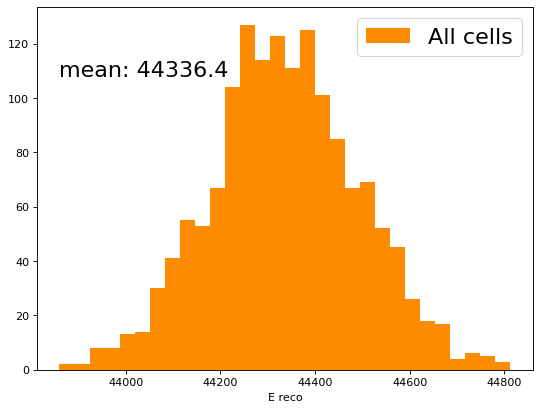

In [360]:
plot_e(input_data["Cell_E_reco_noiseXT_L2"], "All cells", "darkorange")

In [353]:
#Averaging cluster over all the events
def get_average_cluster(x):
    x = np.stack(x)
    x = x.reshape(x.shape[0],5,5)
    y = np.mean(x, axis=0)
    return y

In [354]:
import math
import numpy as np

def plot_cluster(y):
    y_max = np.amax(y)
    f = figure(figsize=(6.2,5.6))
    ax = f.add_axes([0.17, 0.02, 0.72, 0.79])
    axcolor = f.add_axes([0.90, 0.02, 0.03, 0.79])
    im = ax.matshow(y, cmap=cm.Reds, norm=LogNorm(vmin=1, vmax=y_max))
    t = 10**np.arange(0, math.log(y_max,10))
    f.colorbar(im, cax=axcolor, ticks=t, format='$%.2f$')
    f.legend()
    f.show()

No handles with labels found to put in legend.
<ipython-input-354-a8a75d2a8bf1>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


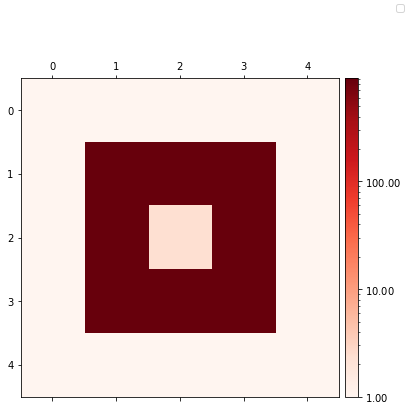

In [355]:
plot_cluster(get_average(input_data2["xtl_amplitude_l2"]))

No handles with labels found to put in legend.
<ipython-input-354-a8a75d2a8bf1>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


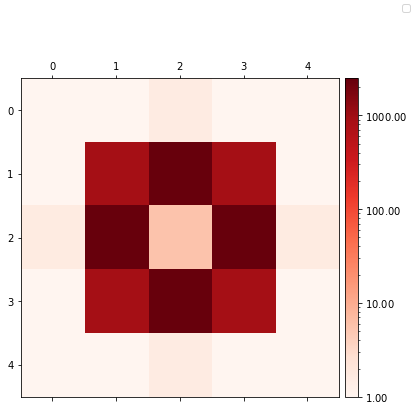

In [356]:
plot_cluster(get_average(input_data2["xtc_amplitude_l2"]+input_data2["xtl_amplitude_l2"]))

No handles with labels found to put in legend.
<ipython-input-354-a8a75d2a8bf1>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


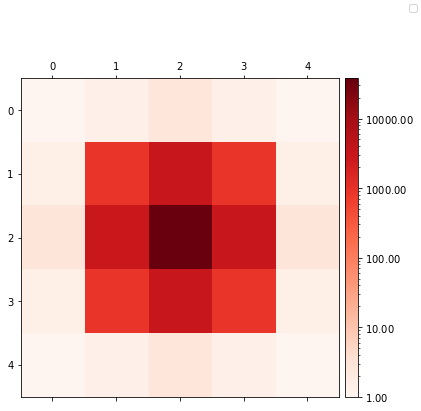

In [357]:
plot_cluster(get_average(input_data2["xtc_amplitude_l2"]+input_data2["xtl_amplitude_l2"]+input_data["Cell_E_truth_L2"]))